In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import numpy as np

# 1. Initialize the Bayesian Network
bn = gum.InfluenceDiagram()

# 2. Adding Chance Nodes
pressure = bn.add(gum.LabelizedVariable("Pressure", "Pressure", 2))          # States: Low, High
wind_speed = bn.add(gum.LabelizedVariable("WindSpeed", "Wind Speed", 3))    # States: Low, Medium, High
wind_direction = bn.add(gum.LabelizedVariable("WindDirection", "Wind Direction", 2))  # States: Offshore, Onshore
wind_conditions = bn.add(gum.LabelizedVariable("WindConditions", "Wind Conditions", 3))  # States: Good, Okay, Bad
swell_direction = bn.add(gum.LabelizedVariable("SwellDirection", "Swell Direction", 2))  # States: Protected, Not Protected
wave_period = bn.add(gum.LabelizedVariable("WavePeriod", "Wave Period", 3))  # States: <8, 8-12, >12
wave_height = bn.add(gum.LabelizedVariable("WaveHeight", "Wave Height", 3))  # States: Small, Medium, Big
actual_wave_size = bn.add(gum.LabelizedVariable("ActualWaveSize", "Actual Wave Size", 3))  # States: Small, Medium, Big
# 3. Adding Utility Node
utility = bn.addUtilityNode(gum.LabelizedVariable("Utility", "Utility", 1))  # Utility nodes have a single state
decision = bn.addDecisionNode(gum.LabelizedVariable("Surf", "Decision to surf or not", 2))
# 4. Defining the Network Structure (Arcs)
bn.addArc(pressure, wind_speed)
bn.addArc(pressure, wind_direction)
bn.addArc(wind_speed, wind_conditions)
bn.addArc(wind_direction, wind_conditions)
bn.addArc(swell_direction, actual_wave_size)
bn.addArc(wave_height, actual_wave_size)
bn.addArc(wave_period, wave_height)

# Connecting Utility Node to Relevant Chance Nodes
bn.addArc(actual_wave_size, utility)
bn.addArc(wind_conditions, utility)
bn.addArc(decision,utility)

# 5. Defining Conditional Probability Distributions (CPDs) for Chance Nodes

# Pressure has no parents
bn.cpt(pressure).fillWith([0.6846, 0.3154])  # Low, High

# WindSpeed depends on Pressure
bn.cpt(wind_speed).fillWith([
    # Pressure=Low
    0.8612, 0.1012, 0.0173,  # Low: Low, Medium, High Wind Speed
    # Pressure=High
    0.8439, 0.1387, 0.0145   # High: Low, Medium, High Wind Speed
])

# WindDirection depends on Pressure
bn.cpt(wind_direction).fillWith([
    # Pressure=Low
    0.4181, 0.5686,        # Offshore, Onshore
    # Pressure=High
    0.3122, 0.6850         # Offshore, Onshore
])

# Define the CPD for WindConditions based on WindSpeed and WindDirection
bn.cpt(wind_conditions).fillWith([
    # WindSpeed=Low, WindDirection=Offshore
    0.95, 0.04, 0.01,    # Good, Okay, Bad

    # WindSpeed=Low, WindDirection=Onshore
    0.2, 0.3, 0.5,       # Good, Okay, Bad

    # WindSpeed=Medium, WindDirection=Offshore
    0.9, 0.06, 0.04,     # Good, Okay, Bad

    # WindSpeed=Medium, WindDirection=Onshore
    0.05, 0.25, 0.7,     # Good, Okay, Bad

    # WindSpeed=High, WindDirection=Offshore
    0.7, 0.2, 0.1,       # Good, Okay, Bad

    # WindSpeed=High, WindDirection=Onshore
    0.01, 0.02, 0.97     # Good, Okay, Bad
])


# SwellDirection has no parents
bn.cpt(swell_direction).fillWith([0.8942, 0.1057])  # Protected, Not Protected

# WavePeriod has no parents
bn.cpt(wave_period).fillWith([0.0866, 0.6737, 0.2397])  # <8, 8-12, >12

# WaveHeight depends on WavePeriod
bn.cpt(wave_height).fillWith([
    # WavePeriod=<8
    0.2947, 0.5474, 0.1579,  # Small, Medium, Big
    # WavePeriod=8-12
    0.1962, 0.5088, 0.2950,  # Small, Medium, Big
    # WavePeriod=>12
    0.0382, 0.2548, 0.7072  # Small, Medium, Big
])

# Define the CPD for ActualWaveSize based on WaveHeight and SwellDirection
bn.cpt(actual_wave_size).fillWith([
    # WaveHeight=Small, SwellDirection=Protected
    0.89, 0.1, 0.01,    # Small, Ideal, Dangerous

    # WaveHeight=Small, SwellDirection=Not Protected
    0.6, 0.35, 0.05,    # Small, Ideal, Dangerous

    # WaveHeight=Medium, SwellDirection=Protected
    0.79, 0.19, 0.02,   # Small, Ideal, Dangerous

    # WaveHeight=Medium, SwellDirection=Not Protected
    0.2, 0.6, 0.2,      # Small, Ideal, Dangerous

    # WaveHeight=Big, SwellDirection=Protected
    0.1, 0.5, 0.4,      # Small, Ideal, Dangerous

    # WaveHeight=Big, SwellDirection=Not Protected
    0.02, 0.18, 0.8     # Small, Ideal, Dangerous
])




# Wind Conditions: 0: Good, 1: Okay, 2: Bad
# Actual Wave Size: 0: Small, 1: Ideal, 2: Dangerous
bn.utility(utility)[{"WindConditions": 0, "ActualWaveSize":0, "Surf":1}] = 90
bn.utility(utility)[{"WindConditions": 0, "ActualWaveSize":0, "Surf":0}] = -45
bn.utility(utility)[{"WindConditions": 0, "ActualWaveSize":1, "Surf":1}] = 100
bn.utility(utility)[{"WindConditions": 0, "ActualWaveSize":1, "Surf":0}] = -50
bn.utility(utility)[{"WindConditions": 0, "ActualWaveSize":2, "Surf":1}] = -90
bn.utility(utility)[{"WindConditions": 0, "ActualWaveSize":2, "Surf":0}] = 10
bn.utility(utility)[{"WindConditions": 1, "ActualWaveSize":0, "Surf":1}] = 50
bn.utility(utility)[{"WindConditions": 1, "ActualWaveSize":0, "Surf":0}] = -10
bn.utility(utility)[{"WindConditions": 1, "ActualWaveSize":1, "Surf":1}] = 70
bn.utility(utility)[{"WindConditions": 1, "ActualWaveSize":1, "Surf":0}] = -15
bn.utility(utility)[{"WindConditions": 1, "ActualWaveSize":2, "Surf":1}] = -95
bn.utility(utility)[{"WindConditions": 1, "ActualWaveSize":2, "Surf":0}] = 10
bn.utility(utility)[{"WindConditions": 2, "ActualWaveSize":0, "Surf":1}] = -12
bn.utility(utility)[{"WindConditions": 2, "ActualWaveSize":0, "Surf":0}] = 6
bn.utility(utility)[{"WindConditions": 2, "ActualWaveSize":1, "Surf":1}] = -10
bn.utility(utility)[{"WindConditions": 2, "ActualWaveSize":1, "Surf":0}] = 5
bn.utility(utility)[{"WindConditions": 2, "ActualWaveSize":2, "Surf":1}] = -100
bn.utility(utility)[{"WindConditions": 2, "ActualWaveSize":2, "Surf":0}] = 10

# bn.utility(utility)[{"WindConditions": 0, "ActualWaveSize":0, "Surf":1}] = 1
# bn.utility(utility)[{"WindConditions": 0, "ActualWaveSize":0, "Surf":0}] = -50
# bn.utility(utility)[{"WindConditions": 0, "ActualWaveSize":1, "Surf":1}] = 0
# bn.utility(utility)[{"WindConditions": 0, "ActualWaveSize":1, "Surf":0}] = 1
# bn.utility(utility)[{"WindConditions": 0, "ActualWaveSize":2, "Surf":1}] = 25 
# bn.utility(utility)[{"WindConditions": 0, "ActualWaveSize":2, "Surf":0}] = 10 
# bn.utility(utility)[{"WindConditions": 1, "ActualWaveSize":0, "Surf":1}] = -25
# bn.utility(utility)[{"WindConditions": 1, "ActualWaveSize":0, "Surf":0}] = 8
# bn.utility(utility)[{"WindConditions": 1, "ActualWaveSize":1, "Surf":1}] = 15
# bn.utility(utility)[{"WindConditions": 1, "ActualWaveSize":1, "Surf":0}] = -2
# bn.utility(utility)[{"WindConditions": 1, "ActualWaveSize":2, "Surf":1}] = 50
# bn.utility(utility)[{"WindConditions": 1, "ActualWaveSize":2, "Surf":0}] = 1
# bn.utility(utility)[{"WindConditions": 2, "ActualWaveSize":0, "Surf":1}] = -3
# bn.utility(utility)[{"WindConditions": 2, "ActualWaveSize":0, "Surf":0}] = -23
# bn.utility(utility)[{"WindConditions": 2, "ActualWaveSize":1, "Surf":1}] = 8
# bn.utility(utility)[{"WindConditions": 2, "ActualWaveSize":1, "Surf":0}] = -17
# bn.utility(utility)[{"WindConditions": 2, "ActualWaveSize":2, "Surf":1}] = 5
# bn.utility(utility)[{"WindConditions": 2, "ActualWaveSize":2, "Surf":0}] = 10




Optimal policy for Surf: 
  Surf             |
0        |1        |
---------|---------|
 0.0000  | 1.0000  |



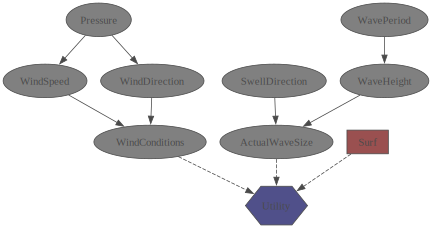

In [2]:
ie = gum.ShaferShenoyLIMIDInference(bn)
ie.makeInference()
optimal_policy = ie.optimalDecision("Surf")
print("Optimal policy for Surf:", optimal_policy)
gnb.showInfluenceDiagram(bn)